<a href="https://colab.research.google.com/github/janmlew/RPG_simulator/blob/master/Randomization!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
d6 = np.random.randint(1, 6)
print(d6)

2


The below cell will roll 50 1d6s, and add these to a list of rolls:

In [47]:
list_of_d6s = []

for i in range(50):
  list_of_d6s.append(np.random.randint(1, 7))

print(list_of_d6s)
print(len(list_of_d6s))

[6, 6, 3, 2, 2, 3, 3, 4, 6, 1, 5, 6, 1, 4, 2, 6, 1, 5, 6, 2, 5, 3, 3, 5, 1, 1, 2, 3, 4, 4, 1, 3, 2, 4, 6, 5, 1, 5, 1, 3, 1, 3, 6, 1, 6, 5, 6, 2, 5, 5]
50


In [48]:
np.average(list_of_d6s)

3.52

In [49]:
np.median(list_of_d6s)

3.0

The below cell will roll 50 2d6s, and add these to a list of rolls:

In [50]:
list_of_2d6s = []

for i in range(50):
  list_of_2d6s.append(np.random.randint(1, 7)+np.random.randint(1, 7))

print(list_of_2d6s, len(list_of_2d6s))

[10, 10, 5, 8, 5, 7, 10, 6, 8, 9, 7, 9, 11, 4, 9, 3, 12, 9, 6, 3, 5, 8, 9, 4, 6, 2, 7, 9, 6, 10, 7, 8, 7, 6, 10, 2, 9, 9, 3, 10, 6, 5, 5, 6, 7, 8, 9, 7, 12, 5] 50


In [51]:
np.average(list_of_2d6s)

7.16

In [52]:
np.median(list_of_2d6s)

7.0

Let's create a creature class. Basically, it should comprise of HP, a die, and a type (e.g. hero, superhero, monster of some kind).
The table below represents hit chances of certain kinds of creatures vis-a-vis other kinds.

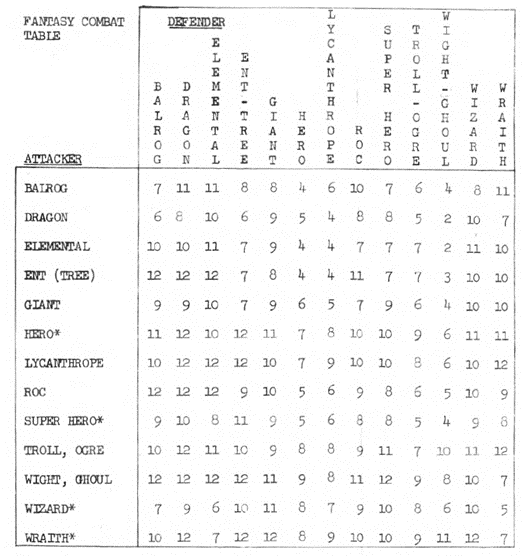

In [53]:
creature_list = ['Balrog', 'Dragon', 'Elemental', 'Ent', 'Tree', 'Giant',
                 'Hero', 'Lycanthrope', 'Roc', 'Super Hero', 'Troll', 'Ogre',
                 'Wight', 'Ghoul', 'Wizard', 'Wraith']
enemy_dict = {
    'Balrog': [7, 6, 10, 12, 12, 9, 11, 10, 12, 9, 10, 10, 12, 12, 7, 10],
    'Dragon': [11, 8, 10, 12, 12, 9, 12, 12, 12, 10, 12, 12, 12, 12, 9, 12],
    'Elemental': [11, 10, 11, 12, 12, 10, 10, 12, 12, 8, 11, 11, 12, 12, 6, 7],
    'Ent': [8, 6, 7, 7, 7, 7, 12, 12, 9, 11, 10, 10, 12, 12, 10, 12],
    'Tree': [8, 6, 7, 7, 7, 7, 12, 12, 9, 11, 10, 10, 12, 12, 10, 12],
    'Giant': [8, 9, 9, 8, 8, 9, 11, 10, 10, 9, 9, 9, 11, 11, 11, 12],
    'Hero': [4, 5, 4, 4, 4, 6, 7, 7, 5, 5, 8, 8, 9, 9, 8, 8],
    'Lycanthrope': [6, 4, 4, 4, 4, 5, 8, 9, 6, 6, 8, 8, 8, 8, 7, 9],
    'Roc': [10, 8, 7, 11, 11, 7, 10, 10, 9, 8, 9, 9, 11, 11, 9, 10],
    'Super Hero': [7, 8, 7, 7, 7, 9, 10, 10, 8, 8, 11, 11, 12, 12, 10, 10],
    'Troll': [6, 5, 7, 7, 7, 6, 9, 8, 6, 5, 7, 7, 9, 9, 8, 9],
    'Ogre': [6, 5, 7, 7, 7, 6, 9, 8, 6, 5, 7, 7, 9, 9, 8, 9],
    'Wight': [4, 2, 2, 3, 3, 4, 6, 6, 5, 4, 10, 10, 8, 8, 6, 11],
    'Ghoul': [4, 2, 2, 3, 3, 4, 6, 6, 5, 4, 10, 10, 8, 8, 6, 11],
    'Wizard': [8, 10, 11, 10, 10, 10, 11, 10, 10, 9, 11, 11, 10, 10, 10, 12],
    'Wraith':  [11, 7, 10, 10, 10, 10, 11, 12, 9, 8, 12, 12, 7, 7, 5, 7],
}
combat_table = pd.DataFrame(enemy_dict, index = creature_list)

In [54]:
print(combat_table)

             Balrog  Dragon  Elemental  Ent  Tree  Giant  Hero  Lycanthrope  \
Balrog            7      11         11    8     8      8     4            6   
Dragon            6       8         10    6     6      9     5            4   
Elemental        10      10         11    7     7      9     4            4   
Ent              12      12         12    7     7      8     4            4   
Tree             12      12         12    7     7      8     4            4   
Giant             9       9         10    7     7      9     6            5   
Hero             11      12         10   12    12     11     7            8   
Lycanthrope      10      12         12   12    12     10     7            9   
Roc              12      12         12    9     9     10     5            6   
Super Hero        9      10          8   11    11      9     5            6   
Troll            10      12         11   10    10      9     8            8   
Ogre             10      12         11   10    10   

In [55]:
# The source of the name_list below is: https://github.com/Snake4life/fantasy-names
name_list = ["Aal", "Abe", "Ad", "Ada", "Ade", "Al", "An", "Ar", "Arn", "Aro", "Aud", "Ave", "Bal", "Bar", "Bel",
             "Ber", "Bri", "Char", "Chris", "Cler", "Col", "Con", "Cor", "Cra", "Cris", "Dan", "Dav", "Der", "Don",
             "Dor", "Dra", "Ed", "Eir", "El", "Eli", "Em", "Eme", "Eng", "Er", "Ever", "Fal", "Far", "Fara", "Fer",
             "Fran", "Fred", "Fril", "Ful", "Ga", "Gab", "Gaer", "Gal", "Gale", "Gar", "Gef", "Geof", "Ger", "Gib",
             "Gil", "Gir", "God", "Gra", "Greg", "Ha", "Hal", "Ham", "Han", "Har", "Have", "Hem", "Hen", "Hewe", "Hig",
             "Hil", "Hor", "Hu", "Hum", "Ian", "Ilo", "Im", "Ing", "Ingel", "Isem", "Ivo", "Iz", "Jac", "Jam", "Jame",
             "Jaqu", "Jar", "Jef", "Jen", "Jer", "Jere", "Jor", "Jose", "Kev", "Kri", "Lam", "Lan", "Lance", "Laun",
             "Leo", "Lor", "Mal", "Malcu", "Mar", "Maug", "Mei", "Mer", "Mic", "Mich", "Mik", "Nic", "Nich", "Nig",
             "Nige", "Nik", "Nil", "Nor", "Nyco", "Ori", "Os", "Pan", "Per", "Perci", "Pet", "Pete", "Pier", "Quo",
             "Rad", "Raf", "Raim", "Rain", "Ran", "Raw", "Ray", "Raym", "Reim", "Rem", "Ren", "Rey", "Reyn", "Ri",
             "Ric", "Rich", "Rob", "Rod", "Rog", "Roge", "Rol", "Rot", "Sal", "Sala", "Sam", "San", "Sar", "Sim",
             "Sten", "Steph", "Syl", "Tan", "Ted", "Teod", "Ter", "Thi", "Thom", "Tib", "To", "Tob", "Tra", "Tris",
             "Tyb", "Tyr", "Uan", "Ul", "Um", "Ur", "Val", "Van", "Vic", "Vil", "Wal", "War", "Wat", "Wi", "Wil",
             "Wim", "Wis", "Wy", "Wym", "Xan", "Xav", "Yen", "Yor", "Ysem", "Zan", "Zyl", "amar", "arat", "alath",
             "avor", "bane", "ben", "borin", "byran", "coril", "craes", "dal", "dar", "deyr", "dil", "dithas", "dorr",
             "driel", "dryn", "duil", "duin", "dyr", "ellan", "elor", "enas", "endyl", "esin", "faelor", "faerd",
             "falen", "farin", "fin", "finas", "fire", "fyndar", "fyr", "gotin", "gretor", "homin", "horn", "idon",
             "indel", "is", "kas", "kath", "koris", "ladar", "ladon", "lael", "laer", "laeril", "laern", "laeron",
             "laith", "lamar", "lamir", "lan", "lanann", "lando", "lanor", "lar", "lareo", "las", "lathan", "lather",
             "leath", "len", "lidyr", "linar", "lion", "lis", "lisar", "lith", "luar", "luin", "lumin", "manas", "mar",
             "mede", "mer", "meron", "minar", "mir", "mitar", "mon", "morn", "mus", "naith", "nall", "nalor", "nan",
             "nar", "naril", "nas", "neak", "neiros", "nian", "nik", "nor", "nos", "orin", "osrin", "ovar", "parin",
             "phanis", "phar", "phon", "qarim", "qinor", "rach", "rath", "rauth", "reak", "red", "rel", "reth", "rian",
             "ridan", "ril", "rion", "rith", "ron", "ros", "roth", "ruil", "rune", "ryll", "rym", "ryn", "rynn",
             "rynnon", "san", "saran", "sariph", "seith", "shor", "sin", "staer", "tael", "taor", "tar", "telar",
             "tevar", "tharal", "thath", "thil", "thin", "thor", "thorn", "tien", "torin", "trydal", "tumil", "uin",
             "valor", "vendor", "verel", "voril", "warith", "win", "word", "xian", "xiron", "yeras", "ynor", "zaphir",
             "zaren", "Aal", "Aan", "Ad", "Ade", "Adel", "Ael", "Al", "Ale", "Ali", "Alu", "Aly", "Am", "Ame", "Amel",
             "An", "Ar", "Ari", "Ath", "Athe", "Aub", "Av", "Ave", "Avi", "Avil", "Beat", "Bel", "Ber", "Bi", "Bran",
             "Bren", "Bri", "Brid", "Brun", "Byn", "Car", "Ced", "Chris", "Clar", "Co", "Cris", "Dar", "Del", "Eb",
             "Ed", "Ede", "Edel", "El", "Eli", "Elin", "Elis", "Eliz", "Elye", "Elyen", "Elys", "Em", "Emel", "Emil",
             "Es", "Esa", "Eve", "Evel", "Eza", "Fae", "Fha", "Ga", "Gab", "Gaen", "Gal", "Gen", "Gene", "Gif", "Gis",
             "Gise", "Gisel", "Glo", "Glor", "Gon", "Gre", "Gres", "Gwen", "Ha", "Had", "Haly", "Har", "Haw", "He",
             "Hege", "Heil", "Hel", "Her", "Herme", "Hil", "Ho", "Hos", "Ib", "Ile", "Ima", "In", "Ioh", "Iro", "Is",
             "Isa", "Ise", "Isel", "Ismen", "Iso", "Isol", "Issa", "Isso", "Ive", "Jac", "Jan", "Jana", "Jean", "Jeh",
             "Jeha", "Jen", "Jene", "Jes", "Jessi", "Jil", "Jin", "Jis", "Joan", "Joh", "Joha", "Joy", "Jul", "Kri",
             "Kys", "Les", "Lib", "Lil", "Lili", "Lin", "Lis", "Liz", "Lora", "MAde", "Ma", "Maal", "Mad", "Maer",
             "Mag", "Mah", "Mal", "Man", "Mar", "Mare", "Mari", "Math", "Maud", "Mel", "Meli", "Mer", "Mere", "Mil",
             "Mili", "Mir", "Mol", "Myl", "Na", "Nan", "Neri", "Ni", "Nin", "Nor", "Ol", "Ophi", "Or", "Ori", "Phaye",
             "Pri", "Qi", "Que", "Rel", "Res", "Roh", "Rosa", "Rose", "Sa", "Sael", "Saf", "Sal", "Sar", "Sara", "Sel",
             "Seph", "Sera", "Sul", "Sus", "Syl", "Ta", "Tam", "Tef", "Teph", "Thef", "Ther", "Tif", "Tyl", "Una",
             "Uri", "Ven", "Vic", "Vyl", "Win", "Wol", "Xil", "Xyr", "Yes", "Yll", "Ysa", "Yv", "Zel", "Zin", "aerys",
             "anys", "atha", "bellis", "brae", "bwynn", "caena", "caiah", "cerys", "charis", "cia", "daerae", "dalar",
             "danna", "dee", "delia", "diane", "dis", "dove", "dris", "due", "dyl", "elor", "enyphe", "faen", "farrel",
             "fine", "galyn", "gwynn", "hala", "hana", "hava", "heira", "hera", "here", "hophe", "kaala", "kaela",
             "kaen", "kiasha", "kilia", "laela", "laema", "laena", "laerla", "laevar", "lahne", "lais", "lana",
             "lanae", "lanil", "lanis", "lanna", "lantha", "lara", "larel", "lartha", "larue", "latha", "laurel",
             "laya", "layna", "ledha", "lee", "lei", "leia", "lena", "lenas", "lendra", "leria", "lessa", "lesse",
             "leth", "letha", "li", "lia", "liana", "liania", "lica", "lihn", "lila", "lin", "lira", "lisa", "litia",
             "livren", "lon", "lone", "lora", "lorna", "lossa", "luna", "lurie", "luth", "lya", "lyn", "lynn", "lynna",
             "lynor", "lynthi", "lyrra", "madia", "mae", "malis", "manda", "mara", "maya", "medha", "mere", "mia",
             "micca", "mylla", "myra", "mythe", "na", "naestra", "nalore", "nalue", "nalyn", "nandra", "naril",
             "narra", "nastha", "nath", "nee", "nesia", "nesra", "nia", "niel", "niya", "noa", "noel", "nor", "nora",
             "nys", "ona", "phenee", "phira", "pisys", "qarin", "qwyn", "radyl", "rae", "raele", "raera", "raine",
             "rainne", "ralla", "rana", "ranthae", "rathla", "ravae", "reene", "rele", "relle", "ria", "riah", "riani",
             "riara", "riel", "rien", "rika", "rila", "rin", "rina", "rindra", "riona", "ris", "rissa", "rith",
             "rithe", "rolia", "rona", "ronyn", "rora", "rue", "runia", "ryl", "ryll", "ryn", "sala", "salia",
             "sarda", "saria", "sario", "seris", "sevel", "shara", "shee", "shera", "shia", "sia", "sianna", "star",
             "stele", "stine", "sula", "synora", "syra", "sys", "tala", "talia", "tarzah", "tha", "thae", "thaela",
             "thana", "thara", "theris", "thion", "thyl", "tihne", "tora", "trana", "tria", "trine", "vae", "vara",
             "viel", "vis", "vyre", "walyn", "wana", "waris", "wyn", "xaris", "xipha", "yana", "yaries", "yeth", "yra",
             "zael", "zee", "zenya", "ziar", "zira", "Ad", "Ae", "Ara", "Bal", "Bei", "Bi", "Bry", "Cai", "Car",
             "Chae", "Cra", "Da", "Dae", "Dor", "Eil", "El", "Ela", "En", "Er", "Fa", "Fae", "Far", "Fen", "Gen",
             "Gil", "Glyn", "Gre", "Hei", "Hele", "Her", "Hola", "Ian", "Iar", "Ili", "Ina", "Jo", "Kea", "Kel", "Key",
             "Kris", "Leo", "Lia", "Lora", "Lu", "Mag", "Mia", "Mira", "Mor", "Nae", "Neri", "Nor", "Ola", "Olo",
             "Oma", "Ori", "Pa", "Per", "Pet", "Phi", "Pres", "Qi", "Qin", "Qui", "Ralo", "Rava", "Rey", "Ro", "Sar",
             "Sha", "Syl", "The", "Tor", "Tra", "Tris", "Ula", "Ume", "Uri", "Va", "Val", "Ven", "Vir", "Waes", "Wran",
             "Wyn", "Wysa", "Xil", "Xyr", "Yel", "Yes", "Yin", "Ylla", "Zin", "Zum", "Zyl", "balar", "banise", "bella",
             "beros", "can", "caryn", "ceran", "cyne", "dan", "di", "dithas", "dove", "faren", "fiel", "fina", "fir",
             "geiros", "gella", "golor", "gwyn", "hana", "harice", "hice", "horn", "jeon", "jor", "jyre", "kalyn",
             "kas", "kian", "krana", "lamin", "lana", "lar", "lee", "len", "leth", "lynn", "maer", "maris", "menor",
             "moira", "myar", "mys", "na", "nala", "nan", "neiros", "nelis", "norin", "peiros", "petor", "phine",
             "phyra", "qen", "qirelle", "quinal", "ra", "ralei", "ran", "rel", "ren", "ric", "rie", "rieth", "ris",
             "ro", "rona", "rora", "roris", "salor", "sandoral", "satra", "stina", "sys", "thana", "thyra", "toris",
             "tris", "tumal", "valur", "varis", "ven", "vyre", "warin", "wenys", "wraek", "wynn", "xalim", "xidor",
             "xina", "xisys", "yarus", "ydark", "ynore", "yra", "zana", "zeiros", "zorwyn", "zumin", "Adalard",
             "Adalbert", "Adalhaid", "Adalolf", "Ageric", "Agilfride", "Agiulf", "Alberic", "Amand", "Andica",
             "Angilbert", "Engilbert", "Ansegisel", "Ansovald", "Aregisel", "Arnegisel", "Arnold", "Arnulf",
             "Audovald", "Austregisel", "Badegisel", "Balderic", "Baldrick", "Baudry", "Berengar", "Berenger",
             "Bernhard", "Bernard", "Bero", "Berthefried", "Bertram", "Burchard", "Carloman", "Chararic", "Charibert",
             "Childebert", "Childebrand", "Childeric", "Chilperic", "Chlodomer", "Chramnesind", "Clodio", "Chlodion",
             "Cloud", "Clovis", "Chlodwig", "Conrad", "Corbus", "Dagobert", "Dagaric", "Drogo", "Drogon", "Durand",
             "Eberhard", "Evrard", "Eberulf", "Ebregisel", "Emmon", "Engelbert", "Egide", "Eracle", "Erard",
             "Erenfried", "Euric", "Farabert", "Floribert", "Fulcaire", "Gararic", "Garivald", "Gerbert", "Gerold",
             "Giselbert", "Gilbert", "Godomar", "Gondulph", "Grimald", "Grimoald", "Griffon", "Guido", "Wido",
             "Gundobad", "Gundovald", "Gunthar", "Guntram", "Hartgard", "Hartmut", "Hartnid", "Heribert", "Hildebald",
             "Hubert", "Imnachar", "Ingelram", "Enguerrand", "Ingomer", "Ingund", "Lambert", "Leudast", "Leuthard",
             "Lothar", "Magnachar", "Magneric", "Malaric", "Marachar", "Marcomir", "Meginhard", "Merovech", "Monulph",
             "Munderic", "Nevelung", "Nibelung", "Nithard", "Notger", "Odilon", "Odo", "Otbert", "Otto", "Otton",
             "Otker", "Pippin", "Pepin", "Ramnulf", "Rathar", "Rathier", "Ratold", "Reginar", "Reginard", "Remacle",
             "Ricbodo", "Ricchar", "Richer", "Ricfried", "Rigunth", "Samson", "Sichar", "Siegfried", "Sigefroy",
             "Sigeric", "Sigibert", "Sigismund", "Sunnegisil", "Sunno", "Tassilo", "Theodard", "Theodebert",
             "Theodemir", "Theodon", "Theodoric", "Thierry", "Theodore", "Theodwin", "Theudebald", "Theuderic",
             "Unroch", "Wala", "Waleran", "Walcaud", "Waltgaud", "Wazo", "Werinbert", "Willichar", "Wolbodo",
             "Wulfhard", "Zwentibold", "Abbo", "Adalbert", "Adaldag", "Adalhard", "Adelard", "Aega", "Agilbert",
             "Agobard", "Aigulf", "Alberic", "Allowin", "Amalricus", "Amand", "Amator", "Angegisis", "Angilbart",
             "Angilbert", "Anno", "Ansegisel", "Anskar", "Arbitio", "Arbogast", "Arbogastes", "Arculf", "Arnoul",
             "Arnulf", "Artaud", "Asselin", "Atacinus", "Audoen", "Audomar", "Audoneus", "Audramnus", "Baugulf",
             "Bauto", "Bavo", "Benild", "Berchar", "Berengar", "Bernard", "Berno", "Bero", "Bertelis", "Berthaire",
             "Bertin", "Bertulf", "Besso", "Birinus", "Blutmund", "Boso", "Bovo", "Brice", "Britius", "Brocard",
             "Bruno", "Burchard", "Butilin", "Carloman", "Cassyon", "Ceufroy", "Charibert", "Charles", "Cheldric",
             "Childebert", "Childebrand", "Childeric", "Chilperic", "Chlodmer", "Chlodowig", "Chlotar", "Chrodegang",
             "Clodomir", "Clotaire", "Clothair", "Clovis", "Corbinian", "Cyr", "Cyricus", "Dado", "Dagobert", "Dalfin",
             "Dodo", "Dreux", "Drogo", "Dudon", "Ebbo", "Ebroin", "Ebrulf", "Einhard", "Emme", "Emmeran", "Engilbert",
             "Enurchus", "Erchinoald", "Evroul", "Evroult", "Fardulf", "Faro", "Flodoard", "Folcard", "Folmar",
             "Fredegar", "Fridolin", "Fridugis", "Fulbert", "Fulk", "Fulrad", "Gerbert", "Gereon", "Gerold",
             "Gifemund", "Giseler", "Giso", "Godobald", "Godun", "Goisfrid", "Goscelin", "Gouzlim", "Gozbert",
             "Gozolon", "Grifo", "Grimald", "Grimbald", "Gunthar", "Guntramn", "Hagen", "Halinard", "Hartmut",
             "Helinand", "Helisachar", "Heribert", "Hildebald", "Hildebold", "Hildeprand", "Hilduin", "Hincmar",
             "Hlodver", "Huebald", "Humbert", "Hunald", "Imbert", "Imninon", "Jocelin", "Lambert", "Lanfranc",
             "Laudus", "Lebuin", "Ledger", "Leger", "Leodegar", "Letard", "Leufred", "Leufroy", "Leutfrid", "Leuthere",
             "Liudhard", "Liudolf", "Lo", "Lothar", "Lul", "Lull", "Maiuel", "Maixent", "Majorian", "Mallobaudes",
             "Mansuetus", "Maraulf", "Marcoul", "Matfrid", "Mauger", "Medard", "Meginhard", "Merobaudes", "Merovech",
             "Nithard", "Norbert", "Nordbert", "Notker", "Odger", "Odo", "Odulf", "Omer", "Orderic", "Otker", "Ouen",
             "Ouus", "Pacatian", "Pair", "Pancras", "Panteleon", "Pepin", "Philibert", "Piligrim", "Pippin", "Poppo",
             "Puvis", "Radigis", "Ragnfred", "Razo", "Reginald", "Reginar", "Remi", "Reolus", "Richomer", "Richomeres",
             "Riquier", "Rothad", "Samo", "Sergius", "Sicho", "Sigebert", "Sigibert", "Suger", "Suidbert", "Suidger",
             "Syagrius", "Tassilo", "Taurin", "Tescelin", "Thankmar", "Theodard", "Theodoric", "Theodulf", "Theodulph",
             "Theudebert", "Theuderic", "Theutgaud", "Thierry", "Thietmar", "Turpin", "Vedast", "Vicelin", "Vigor",
             "Vulmar", "Waiofar", "Wala", "Walaric", "Waldolanus", "Waltgaud", "Wandregisel", "Wandregisilus",
             "Wandrille", "Warmann", "Werinbert", "Wibert", "Wichmann", "Willehad", "Willibald", "Willibrord",
             "Wulfram", "Adelbert", "Adelgrim", "Adelard", "Alaric", "Alberic", "Andwise", "Ansegar", "Arnor",
             "Athanaric", "Balbo", "Banazir", "Bandobras", "Belisarius", "Bercilac", "Berilac", "Bilba", "Bilbo",
             "Bilcuzal", "Bildad", "Bildat", "Bingo", "Bladud", "Blanco", "Bucca", "Bob", "Basso", "Bodo", "Bosco",
             "Bowman", "Briffo", "Bruno", "Brutus", "Bungo", "Caradas", "Caradoc", "Carambo", "Carl", "Cedivar",
             "Celedor", "Ceredic", "Cerdic", "Columbus", "Conrad", "Cosimo", "Cotman", "Cottar", "Crassus", "Crispus",
             "Deagol", "Dinodas", "Doderic", "Dodinas", "Drogo", "Dudo", "Elfstan", "Erling", "Everard", "Falco",
             "Faramir", "Faramond", "Fastred", "Fastolph", "Ferdinand", "Ferumbras", "Filibert", "Flambard", "Flavus",
             "Folcard", "Folco", "Fortinbras", "Fosco", "Fredegar", "Frodo", "Fulvus", "Gerontius", "Goodwill",
             "Gorhendad", "Gorbadoc", "Gorbaduc", "Gorbulas", "Gormadoc", "Griffo", "Gringamor", "Grossman", "Gruffo",
             "Guido", "Gundabald", "Gundahar", "Gundobad", "Gundolpho", "Habaccuc", "Haiduc", "Hal", "Halfred",
             "Hamfast", "Hamilcar", "Harding", "Hending", "Heribald", "Herugar", "Hildibrand", "Hildigard",
             "Hildifons", "Hildigrim", "Hob", "Hobson", "Holfast", "Holman", "Hugo", "Ilberic", "Iago", "Inigo",
             "Iolo", "Isembard", "Isembold", "Isengar", "Isengrim", "Isengrin", "Isumbras", "Jago", "Jo", "Jolly",
             "Kalimac", "Lamorac", "Largo", "Longo", "Lotho", "Madoc", "Magnus", "Marcho", "Marco", "Marcus",
             "Marmadoc", "Marmaduc", "Marmaduke", "Marroc", "Matta", "Mattalic", "Maura", "Melampus", "Meneaduc",
             "Marmadas", "Meriadoc", "Merimac", "Merimas", "Merry", "Milo", "Minto", "Moro", "Mosco", "Mungo",
             "Nahand", "Nob", "Nibs", "Nicol", "Nick", "Obo", "Odo", "Odovacar", "Olo", "Orgulas", "Orlando", "Otho",
             "Peregrin", "Pippin", "Polo", "Ponto", "Porro", "Posco", "Priamus", "Prospero", "Ranugad", "Razanur",
             "Reginard", "Robin", "Robur", "Roderic", "Rollo", "Rorimac", "Rudibert", "Rudigar", "Rudolph", "Rufus",
             "Sadoc", "Sago", "Samlad", "Samwise", "Sancho", "Sagramor", "Saradas", "Saradoc", "Scudamor", "Seredic",
             "Sigismond", "Smeagol", "Ted", "Theobald", "Theodoric", "Timba", "Tim", "Timothy", "Tobias", "Tobold",
             "Togo", "Tolman", "Tomba", "Tomburan", "Tomacca", "Trahand", "Uffo", "Valdemar", "Vigo", "Wilcome",
             "Wilibald", "Wilimar", "Will", "Wiseman", "Adallinda", "Adaltrude", "Adelheid", "Alpaida", "Alpais",
             "Ansgard", "Aubirge", "Audofleda", "Baldechildis", "Basina", "Begga", "Berenga", "Bertha", "Bertrada",
             "Burgundefara", "Clothild", "Eadgithu", "Emma", "Engelberga", "Ermengard", "Ermentrudis", "Fara",
             "Fastrada", "Foy", "Genofeva", "Gersvinda", "Gisela", "Gudula", "Gudule", "Gundrada", "Herleva",
             "Hildegard", "Hildegarde", "Hildegund", "Hiltrude", "Hodierna", "Ingeltrude", "Ingeltrudis", "Joveta",
             "Liobsynde", "Liutgarde", "Madelgarde", "Mechtild", "Moschia", "Nantechildis", "Oda", "Ogiva",
             "Plectrudis", "Radogund", "Rosamund", "Rothaide", "Rotrude", "Rotrudis", "Ruothilde", "Theodelinda",
             "Theoderada", "Theutberga", "Waldrada", "Adaltrude", "Adallind", "Adallinda", "Adelhaid", "Adda",
             "Albofleda", "Alpaide", "Alpais", "Aregund", "Aude", "Audofleda", "Audovera", "Austrechild", "Atula",
             "Athalia", "Adele", "Baldechildis", "Basina", "Bave", "Berchildis", "Begga", "Beretrude", "Bertha",
             "Berthe", "Berthefled", "Berthefried", "Berthegund", "Bertoane", "Bertrada", "Bilichildis", "Blesinde",
             "Brunhild", "Brunhilda", "Fastrada", "Chlodeswinthe", "Chlodosind", "Chlothsinda", "Chrodechildis",
             "Chrodtrude", "Clotild", "Clotilde", "Chunsina", "Cunegonde", "Kunegund", "Cunegundis", "Cunegund",
             "Deuteria", "Ealswid", "Ellinrat", "Engelberge", "Ingelburga", "Engeltrude", "Ermenberga", "Ermengarde",
             "Ermentrudis", "Faileuba", "Fastrada", "Fredegunde", "Galswinth", "Gersvinda", "Gisela", "Gundrada",
             "Gundradis", "Gomatrudis", "Goiswinth", "Gundrade", "Guntheuc", "Gunza", "Hamesindis", "Hatilde",
             "Hildeburg", "Hildegarde", "Hiltrude", "Himiltrud", "Ingeltrud", "Ingitrude", "Ingoberg", "Ingunde",
             "Irmgard", "Irmingard", "Itta", "Lanthechilde", "Leubast", "Leubovera", "Liutgarde", "Luitgarde",
             "Magnatrude", "Marcatrude", "Marcovefa", "Madelgarde", "Madelgarda", "Merofled", "Merwig", "Nantechildis",
             "Radegund", "Ragnachilde", "Regintrude", "Regnetrudis", "Rigunth", "Rosamund", "Rotrud", "Ruodhaid",
             "Ruothild", "Ruothilde", "Rothaide", "Rotrude", "Swanahilde", "Teutberga", "Theoderada", "Theodrada",
             "Theodelinda", "Theodrade", "Theudechild", "Theudelinde", "Ultrogotha", "Veneranda", "Vuldretrada",
             "Vulfegundis", "Wisigard", "Adaldrida", "Alfrida", "Amalda", "Amanda", "Amaranth", "Amethyst",
             "Angelica", "Arabella", "Asphodel", "Belba", "Belinda", "Bellisima", "Bell", "Belladonna", "Bertha",
             "Berylla", "Camelia", "Cara", "Caramella", "Celendine", "Cora", "Cornelia", "Chica", "Daisy", "Diamanda",
             "Diamond", "Dina", "Donnamira", "Dora", "Duenna", "Eglantine", "Elanor", "Esmeralda", "Estella", "Fatima",
             "Gerda", "Gilly", "Gloriana", "Goldilocks", "Grimalda", "Hilda", "Jasmine", "Jemima", "Jessamine",
             "Lalia", "Laura", "Lavinia", "Lily", "Linda", "Lobelia", "Malva", "Marigold", "Mantissa", "Matilda",
             "Maxima", "May", "Melba", "Melilot", "Melissa", "Menegilda", "Mentha", "Mimosa", "Mirabella", "Miranda",
             "Myrtle", "Nina", "Nora", "Pamphila", "Pandora", "Pansy", "Pearl", "Peony", "Pervinca", "Pimpernel",
             "Poppy", "Prima", "Primrose", "Primula", "Prisca", "Regina", "Rhoda", "Robinia", "Rosa", "Rosamunda",
             "Rose", "Rowan", "Ruby", "Salvia", "Savanna", "Selina", "Semolina", "Tanta", "Yolanda", "Abigail",
             "Alexandra", "Alexandria", "Alexis", "Alia", "Alicia", "Allison", "Alura", "Alyssa", "Amanda", "Amber",
             "Amy", "Andrea", "Angela", "Anna", "Autumn", "Bailey", "Brianna", "Brittany", "Brooke", "Caitlin",
             "Calamity", "Caroline", "Cassandra", "Catherine", "Chelsea", "Cheryl", "Cheyenne", "Christina", "Cori",
             "Courtney", "Danielle", "Darby", "Deirdre", "Delaney", "Destiny", "Devin", "Diana", "Donna", "Elizabeth",
             "Ellie", "Emily", "Emma", "Erica", "Erin", "Esmee", "Fallon", "Fiona", "Gabrielle", "Ginelle", "Grace",
             "Haley", "Hannah", "Heather", "Iridian", "Jacqueline", "Jasmine", "Jenna", "Jennifer", "Jessica",
             "Jordan", "Julia", "Kaitlyn", "Katherine", "Katie", "Kayla", "Keena", "Keira", "Kelsey", "Kestrel",
             "Kiley", "Kimberly", "Kristen", "Kymma", "Laura", "Lauren", "Leesha", "Lenora", "Lindsey", "Llewella",
             "Mackenzie", "Madeline", "Madison", "Maria", "Mariah", "Marissa", "Mary", "Megan", "Melissa", "Michelle",
             "Mindy", "Miranda", "Moira", "Molly", "Monica", "Morgan", "Myrna", "Natalie", "Neela", "Nicole", "Nora",
             "Olivia", "Paige", "Rachel", "Rebecca", "Roslyn", "Rowan", "Ryan", "Rylee", "Sabrina", "Saffron",
             "Samantha", "Sarah", "Sarai", "Savannah", "Scarlet", "Sestiva", "Shanna", "Shannon", "Shawna", "Shelby",
             "Sierra", "Sophie", "Stephanie", "Suri", "Sydney", "Tabitha", "Tara", "Taryn", "Tasha", "Tatiana",
             "Tavia", "Taylor", "Terri", "Tiffany", "Vanessa", "Victoria", "Baggins", "Banks", "Barrowes", "Bilberry",
             "Boffin", "Bolger", "Bolger-Baggins", "Bophin", "Boulderhill", "Bottomhill", "Bracegirdle",
             "Bramblethorn", "Brandagamba", "Brandybuck", "Brandywood", "Brockhouse", "Brown", "Brownlock", "Bunce",
             "Burrowes", "Burrows", "Butcher", "Button", "Chubb", "Chubb-Baggins", "Clayhanger", "Cotton", "Cutton",
             "Dewfoot", "Diggle", "Elvellon", "Farfoot", "Fairbairn", "Fairfoot", "Fallohide", "Featherbottom",
             "Finnagund", "Fleetfoot", "Galbassi", "Galpsi", "Gamgee", "Gammidge", "Gamwich", "Gardner", "Gaukrogers",
             "Gawkroger", "Gluttonbelly", "Goldworthy", "Goodbody", "Goodchild", "Goodsong", "Goodwort", "Goold",
             "Greenhand", "Greenhill", "Grubb", "Hairyfoot", "Harfoot", "Hayward", "Headstrong", "Heathertoes",
             "Hedgehopper", "Hlothran", "Hogpen", "Hopesinger", "Hornblower", "Hornwood", "Knotwise", "Labingi",
             "Langham", "Leafwalker", "Lightfoot", "Littlefoot", "Longbottom", "Longhole", "Longfoot", "Longriver",
             "Lothran", "Maggot", "Mugwort", "Noakes", "Noakesburrow", "North-took", "Oakbottom", "Oldbuck", "Pott",
             "Proudbottom", "Proudfoot", "Proudbody", "Proudmead", "Puddifoot", "Puddlefoot", "Riverhopper", "Roper",
             "Rumble", "Rumblebelly", "Sackville", "Sackville-Baggins", "Sandheaver", "Sandyman", "Silentfoot",
             "Silverstring", "Smallburrow", "Stoor", "Stumbletoe", "Swiftfoot", "Thornburrow", "Tinyfoot", "Took",
             "Took-Brandybuck", "Took-Took", "Townsend", "Tunnelly", "Twofoot", "Underburrow", "Underfoot",
             "Underhill", "Undertree", "Underlake", "Wanderfoot", "Whitfoot", "Whitbottom", "Zaragamba",
             "The Accidental", "The Ancient", "The Aqua", "The Awesome", "The Black", "The Blue", "The Brass",
             "The Brave", "The Broad", "The Broken", "The Bronze", "The Calm", "The Clever", "The Cold",
             "The Colossal", "The Confident", "The Cool", "The Copper", "The Crimson", "The Dapper", "The Dark",
             "The Defiant", "The Dramatic", "The Eager", "The Earth", "The Earthen", "The Electric", "The Electron",
             "The Elegant", "The Ethereal", "The Fabulous", "The Famous", "The Fancy", "The Fantastic", "The Fast",
             "The Fearless", "The Fiery", "The Fire", "The Galactic", "The Gentle", "The Giant", "The Gigantic",
             "The Glorious", "The Godly", "The Golden", "The Good", "The Gorgeous", "The Gray", "The Green",
             "The Heavenly", "The Heavy", "The Honorable", "The Hot", "The Huge", "The Hypnotic", "The Ice",
             "The Impossible", "The Incredible", "The Infamous", "The Intelligent", "The Iron", "The Jade",
             "The Jolly", "The Kind", "The Light", "The Long", "The Lucky", "The Macho", "The Magical",
             "The Magnificent", "The Majestic", "The Mammoth", "The Marked", "The Marvelous", "The Merciful",
             "The Mighty", "The Misty", "The Mysterious", "The Nifty", "The Nimble", "The Nuclear", "The Old",
             "The Orange", "The Outrageous", "The Pink", "The Proud", "The Purple", "The Quantum", "The Quick",
             "The Quiet", "The Rapid", "The Red", "The Righteous", "The Royal", "The Scarlet", "The Silver",
             "The Smooth", "The Spectacular", "The Steel", "The Storm", "The Swift", "The Terrific", "The Thunder",
             "The Vengeful", "The Voiceless", "The Wacky", "The Water", "The Whispering", "The White", "The Wise",
             "The Yellow", "Robin", "Owl", "Vulture", "Condor", "Falcon", "Merlin", "Eagle", "Hawk", "Swan", "Ibis",
             "Crane", "Snipe", "Macaw", "Amazon", "Nighthawk", "Nightowl", "Monarch", "Lord", "Crow", "Raven",
             "Swallow", "Starling", "Sparrow", "Ant", "Antman", "Wasp", "Phoenix", "Waspman", "Grasshopper",
             "Cricket", "Beetle", "Assassin", "Mantis", "Mothman", "Moth", "Termite", "Dragonfly", "Elephantman",
             "Wolf", "Wolfman", "Bat", "Rhino", "Rhinoceros", "Cat", "Catman", "Lynx", "Gorilla", "Leopard",
             "Armadillo", "Bear", "Tiger", "Lion", "Fox", "Raccoon", "Ox", "Oxman", "Puma", "Panther", "Wolverine",
             "Cheetah", "Mongoose", "Jackal", "Hornet", "Warrior", "Fighter", "Angel", "Devil", "Guardian",
             "Protector", "Champion", "Defender", "Saviour", "Guard", "Watcher", "Slayer", "Killer", "Soldier",
             "Marksman", "Sniper", "Commando", "Gunner", "Mercenary", "Scout", "Veteran", "Sentinel", "Shepherd",
             "Warden", "Keeper", "Watchman", "Magician", "Charmer", "Conjurer", "Enchanter", "Genius", "Illusionist",
             "Prophet", "Seer", "Shaman", "Siren", "Wizard", "Mage", "Master", "Mastermind", "Prodigy", "Sage",
             "Wonder", "Wonderman", "Whiz", "Spectacle", "Duke", "Baron", "Prince", "Shield", "Sword", "Dagger",
             "Trident", "Knuckles", "Daggers", "Swordsman", "Scimitar", "Katana", "Axeman", "Scepter", "Hammer",
             "Gladiator", "Shadow", "Shade", "Gloom", "Spy", "Agent", "Detective", "Mole", "Leader", "Vindicator",
             "Captain", "Chief", "Doctor", "General", "Smasher", "Spirit", "Scorpion", "Spider", "Doctor", "Captain",
             "Doctor", "Captain", "Lord", "Professor", "Professor", "Mister", "Commander", "Master", "Agent", "Master",
             "Agent", "Chief", "Warden", "Red", "Blue", "Green", "Yellow", "Purple", "Pink", "Gray", "Dark", "Light",
             "Orange", "Galactic", "Black", "White", "Clever", "Famous", "Infamous", "Brave", "Calm", "Gentle",
             "Proud", "Dapper", "Eager", "Jolly", "Broad", "Brass", "Copper", "Golden", "Silver", "Bronze", "Iron",
             "Steel", "Huge", "Mammoth", "Gigantic", "Colossal", "Quiet", "Thundering", "Whispering", "Ancient",
             "Fast", "Fancy", "Magnificent", "Mysterious", "Old", "Long", "Rapid", "Swift", "Quick", "Broken", "Cold",
             "Cool", "Hot", "Heavy", "Light", "Good", "Eager", "Fiery", "Elegent", "Electric", "Defiant", "Brave",
             "Accidental", "Ethereal", "Dramatic", "Awesome", "Impossible", "Incredible", "Intelligent", "Heavenly",
             "Honorable", "Huge", "Hypnotic", "Gentle", "Giant", "Glorious", "Godly", "Gorgeous", "Fabulous", "Fancy",
             "Fantastic", "Fearless", "Kind", "Lucky", "Macho", "Magical", "Majestic", "Marked", "Marvelous", "Mighty",
             "Messy", "Merciful", "Misty", "Nifty", "Nimble", "Outrageous", "Confident", "Rapid", "Righteous", "Royal",
             "Terrific", "Smooth", "Spectacular", "Wacky", "Wise", "Vengeful", "Voiceless", "Unarmed", "Armed",
             "Nuclear", "Scarlet", "Quantum", "Electron", "Crimson", "Fire", "Ice", "Earth", "Earthen", "Water",
             "Aqua", "Storm", "Thunder", "Masquerade", "Robin", "Owl", "Vulture", "Condor", "Falcon", "Merlin",
             "Eagle", "Hawk", "Swan", "Ibis", "Phoenix", "Crane", "Snipe", "Macaw", "Amazon", "Nighthawk", "Nightowl",
             "Monarch", "Lord", "Crow", "Raven", "Swallow", "Starling", "Sparrow", "Ant", "Antman", "Wasp", "Waspman",
             "Grasshopper", "Cricket", "Beetle", "Assassin", "Mantis", "Mothman", "Moth", "Termite", "Dragonfly",
             "Elephantman", "Wolf", "Wolfman", "Bat", "Rhino", "Rhinoceros", "Cat", "Catman", "Lynx", "Gorilla",
             "Leopard", "Armadillo", "Bear", "Tiger", "Lion", "Fox", "Raccoon", "Ox", "Oxman", "Puma", "Panther",
             "Wolverine", "Cheetah", "Mongoose", "Jackal", "Hornet", "Warrior", "Fighter", "Angel", "Devil",
             "Guardian", "Protector", "Champion", "Defender", "Saviour", "Watcher", "Slayer", "Killer", "Sentinel",
             "Shepherd", "Magician", "Charmer", "Conjurer", "Enchanter", "Genius", "Illusionist", "Prophet",
             "Mastermind", "Prodigy", "Sage", "Wonder", "Spectacle", "Shield", "Sword", "Dagger", "Trident",
             "Knuckles", "Daggers", "Swordsman", "Scimitar", "Katana", "Axeman", "Scepter", "Hammer", "Shadow",
             "Shade", "Gloom", "Mole", "Smasher", "Spirit", "Scorpion", "Spider", "Frost", "Golden Hope", "Hope",
             "Elemental", "Impossible Girl", "Griffin", "Tecton", "Captain Atomic", "Titanio", "Solar Flare",
             "Alley Cat", "Snow Storm", "Absolute Zero", "The Great Defender", "Timeline", "Skylar Storm", "Optimo",
             "Remix", "Citadel", "Alpha Dog", "Brain Matter", "Dark Warrior", "The Crusher", "Owl", "Incognito",
             "Gray Granite", "Gamma", "Spark Plug", "Silver Shield", "Quiver", "Smoke", "Captain Quake", "Icicle",
             "Metanite", "Blaze", "Fantasia", "Phantasm", "Sparks", "Ace", "Amethyst Heart", "Animalia", "Armed",
             "Black Bat", "Black Cat", "Black Knight", "Black Phoenix", "Black Star", "Blitzfire", "Boler", "Bolt",
             "Brass Bison", "Bright Shadow", "Broken Watchman", "Choicemaker", "Cleanser", "Crazy Eight", "Creature",
             "Criss Cross", "Dark Flame", "Dark Omen", "Dark Titan", "Dazzler", "Deadnite", "Death Roach",
             "Doctor Chronos", "Doctor Dynasty", "Doctor Juggernaut", "Doctor Titanium", "Dragon Boy",
             "Dragon Spectre", "Dragonloom", "Dragontooth", "Electric Arrow", "Eltrocus", "Ethereal Phoenix",
             "Ethereal Titan", "Fallen Pheonix", "Fiery Falcon", "Firebird", "Freefall", "Frozenstar",
             "Galactic Gargoyle", "Gecko", "Griffin", "Heavy Step", "Helon", "Heloth", "Hopewing", "Ice Raven",
             "Iron Archer", "Iron Assassin", "Jade Stranger", "King Scorp", "Mad Manta", "Makeshift",
             "Marked Stranger", "Master Defiance", "Mighty Mamba", "Mister Penance", "Mister X", "Mister Y",
             "Misty Manta", "Moon Halo", "Moonshadow", "Nightbolt", "Nightleaf", "Nightquake", "Nightwave", "Orothos",
             "Osa", "Peacebringer", "Phantom", "Phantom Archer", "Phantom Kid", "Phantom Spectre", "Phoen-X",
             "Quantum Colossus", "Quantum Commander", "Razor", "Red Heart", "Rosethorn", "Saber", "Saberleaf", "Sage",
             "Savior", "Scarlet Feathers", "Scarlet Horse", "Scarlet King", "Scarlet Sentinel", "Shaden", "Shadow",
             "Shadowleaf", "Shadowstar", "Silver Goliath", "Silver Shepherd", "Silver Wolf", "Snow Raven", "Spitfire",
             "Spur", "Star Sentinel", "Starbright", "Stareye", "Starlight", "Starry Night", "Sunspot", "Switcher",
             "The Hunter", "The Last One", "Thornhead", "Thunder Hawk", "Thunderclap", "Thundering Whisper", "Venom",
             "Venombite", "Voiceless Stranger", "Wi-Fire", "Wild Tornado", "Wildfire", "Wildflame", "Karma"]

capitalized_name_list = []

for name in name_list:
    capitalized_name_list.append(name.capitalize())

In [56]:
class Creature:
  def __init__(self, name, hp=None, die=None, kind="Hero"):
    self.name = name
    self.hp = hp
    self.die = die
    self.kind = kind

  def is_alive(self):
    if self.hp < 0:
      return False
    else:
      return True

In [57]:
# combat_lookup returns the successful attack roll threshold

def combat_lookup(cre1, cre2): # cre1 is an attacker
  return combat_table.loc[cre1.kind, cre2.kind]

In [58]:
bargol = Creature(name="Zły", hp=100, kind="Balrog")
hadrian_sandberg = Creature(name="Hadrian Sandberg", hp=31, kind="Dragon")

print(combat_lookup(bargol, hadrian_sandberg),
      combat_lookup(hadrian_sandberg, bargol))

11 6


In [59]:
def strike(cre1, cre2, cre1_initiative, cre2_initiative):
    # No surprise attacks implemented yet, so both creatures try to hit.
    first_roll = np.random.randint(1, 7, 2).sum()
    second_roll = np.random.randint(1, 7, 2).sum()

    if cre1_initiative > cre2_initiative:
        print(cre1.name, "have rolled", first_roll, "on its attack roll.")
        if first_roll < combat_lookup(cre1, cre2):
            print(cre1.name, "missed!")
        else:
            print("Hit!")
            # Creatures roll 1d6 for damage.
            hit1 = np.random.randint(1, 7)
            print(cre1.name, "hits for", hit1, "damage.")
            cre2.hp -= hit1
        # Checks whether the second creature has a chance to counter
        if cre2.is_alive():
            print(cre2.name, "have rolled", second_roll, "on its attack roll.")
            if second_roll < combat_lookup(cre2, cre1):
                print(cre2.name, "missed!")
            else:
                print("Hit!")
                # Creatures roll 1d6 for damage.
                hit2 = np.random.randint(1, 7)
                print(cre2.name, "hits for", hit2, "damage.")
                cre1.hp -= hit2
    elif cre1_initiative == cre2_initiative:
        print(cre1.name, "have rolled", first_roll, "on its attack roll.")
        if first_roll < combat_lookup(cre1, cre2):
            print(cre1.name, "missed!")
        else:
            print("Hit!")
            # Creatures roll 1d6 for damage.
            hit1 = np.random.randint(1, 7)
            print(cre1.name, "hits for", hit1, "damage.")
            cre2.hp -= hit1
        print(cre2.name, "have rolled", second_roll, "on its attack roll.")
        if second_roll < combat_lookup(cre2, cre1):
            print(cre2.name, "missed!")
        else:
            print("Hit!")
            # Creatures roll 1d6 for damage.
            hit2 = np.random.randint(1, 7)
            print(cre2.name, "hits for", hit2, "damage.")
            cre1.hp -= hit2
    else:
        print(cre2.name, "have rolled", first_roll, "on its attack roll.")
        if first_roll < combat_lookup(cre2, cre1):
            print(cre2.name, "missed!")
        else:
            print("Hit!")
            # Creatures roll 1d6 for damage.
            hit1 = np.random.randint(1, 7)
            print(cre2.name, "hits for", hit1, "damage.")
            cre1.hp -= hit1
        # Checks whether the first creature has a chance to counter
        if cre1.is_alive():
            print(cre1.name, "have rolled", second_roll, "on its attack roll.")
            if second_roll < combat_lookup(cre1, cre2):
                print(cre1.name, "missed!")
            else:
                print("Hit!")
                # Creatures roll 1d6 for damage.
                hit2 = np.random.randint(1, 7)
                print(cre1.name, "hits for", hit2, "damage.")
                cre2.hp -= hit2

In [60]:
def combat(cre1, cre2):
    print(cre1.name, "has", cre1.hp, "HPs, while", cre2.name, "has", cre2.hp,
          "HPs before the fight.")
    # Checks whether creatures can participate in a fight.
    if not (cre1.is_alive() and cre2.is_alive()):
        print("Dead creatures cannot fight! Choose living contestants.")
        print('-'*80)
        return None

    # Initiative checks. Simultaneous fight is effectively treated like an
    # initiative roll in favor of cre1.
    cre1_initiative = np.random.randint(1, 7)
    print(cre1.name, "have rolled", cre1_initiative, "on initiative roll.")
    cre2_initiative = np.random.randint(1, 7)
    print(cre2.name, "have rolled", cre2_initiative, "on initiative roll.")
    if cre1_initiative == cre2_initiative:
        print("Both creatures strike at the same time!")
    elif cre1_initiative > cre2_initiative:
        print(cre1.name, "strikes first in combat!")
    else:
        print(cre2.name, "strikes first in combat!")

    while cre1.is_alive() and cre2.is_alive():
        strike(cre1, cre2, cre1_initiative, cre2_initiative)

    if (not cre1.is_alive()) and (not cre2.is_alive()):
        print(cre1.name, "and", cre2.name, "killed themselves!")
        print(cre1.name, "has", cre1.hp, "HPs, while", cre2.name, "has", cre2.hp,
              "HPs after the fight.")
        print('-'*80)
    elif not cre1.is_alive():
        print(cre1.name, "killed", cre2.name + ".")
        print("After the fight,", cre1.name, "has", cre1.hp, "HPs, while", cre2.name, "has", cre2.hp,
              "HPs.")
        print('-'*80)
    else:
        print(cre2.name, "killed", cre1.name + ".")
        print("After the fight,", cre1.name, "has", cre1.hp, "HPs, while", cre2.name, "has", cre2.hp,
              "HPs.")
        print('-'*80)

In [61]:
combat(hadrian_sandberg, bargol)

Hadrian Sandberg has 31 HPs, while Zły has 100 HPs before the fight.
Hadrian Sandberg have rolled 3 on initiative roll.
Zły have rolled 5 on initiative roll.
Zły strikes first in combat!
Zły have rolled 7 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 3 on its attack roll.
Hadrian Sandberg missed!
Zły have rolled 7 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 8 on its attack roll.
Hit!
Hadrian Sandberg hits for 5 damage.
Zły have rolled 8 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 4 on its attack roll.
Hadrian Sandberg missed!
Zły have rolled 8 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 10 on its attack roll.
Hit!
Hadrian Sandberg hits for 3 damage.
Zły have rolled 4 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 6 on its attack roll.
Hit!
Hadrian Sandberg hits for 3 damage.
Zły have rolled 8 on its attack roll.
Zły missed!
Hadrian Sandberg have rolled 5 on its attack roll.
Hadrian Sandberg missed!
Zły have

In [62]:
list_of_creatures: list[Creature] = []

In [63]:
def create_more_monsters(size):
    # Creates a randomized list of n creatures, where n = size.
    for n in range(1, size + 1):
        kind = creature_list[np.random.randint(0, 16)]
        hp = sum(np.random.randint(1, 7, 4))
        creature_name = capitalized_name_list[np.random.randint(0, len(capitalized_name_list))]
        list_of_creatures.append(Creature(name=creature_name, hp=hp, die=4, kind=kind))

This creates 100 random creatures.

In [64]:
create_more_monsters(100)

In [65]:
# Pits pairs of creatures in fights.
for x in range(0, int((len(list_of_creatures)+1)/2.0)):
    combat(list_of_creatures[x], list_of_creatures[x+int(len(list_of_creatures)/2.0)])

Ing has 15 HPs, while Walyn has 10 HPs before the fight.
Ing have rolled 3 on initiative roll.
Walyn have rolled 2 on initiative roll.
Ing strikes first in combat!
Ing have rolled 12 on its attack roll.
Hit!
Ing hits for 5 damage.
Walyn have rolled 7 on its attack roll.
Hit!
Walyn hits for 3 damage.
Ing have rolled 5 on its attack roll.
Ing missed!
Walyn have rolled 8 on its attack roll.
Hit!
Walyn hits for 1 damage.
Ing have rolled 8 on its attack roll.
Ing missed!
Walyn have rolled 10 on its attack roll.
Hit!
Walyn hits for 6 damage.
Ing have rolled 8 on its attack roll.
Ing missed!
Walyn have rolled 8 on its attack roll.
Hit!
Walyn hits for 5 damage.
Ing have rolled 9 on its attack roll.
Hit!
Ing hits for 5 damage.
Walyn have rolled 9 on its attack roll.
Hit!
Walyn hits for 5 damage.
Ing killed Walyn.
After the fight, Ing has -5 HPs, while Walyn has 0 HPs.
--------------------------------------------------------------------------------
Rhinoceros has 8 HPs, while Isengar has 16 HPs 

In [66]:
hps = []
for x in range(0, len(list_of_creatures)):
    print(list_of_creatures[x].name, list_of_creatures[x].hp)
    hps.append(list_of_creatures[x].hp)

Ing -5
Rhinoceros -3
Green -4
Vic -1
Owl -3
Zaren 11
Brooke 15
Lothar 9
Nyco -4
Grossman -2
Nibelung -1
Oakbottom 20
Cheetah 16
Kimberly -3
The storm -1
Jere 16
Eliz 7
Win -3
Leuthere 5
Leudast -1
Enguerrand -5
Aub -1
Olo -1
Ziar 6
Horn 2
Hana 2
Man 0
Daerae -1
Impossible 12
Hlodver 15
Nibelung 12
Fae -1
Syra -1
Nor 15
Hildigrim -3
Eracle 13
Laith -3
Menegilda -6
Ven -5
Xyr -4
Marco 0
Beros 16
Belinda 15
Shadowstar 15
Ive -1
Samlad -3
Merovech 17
Featherbottom -5
Sia 5
Wolf -4
Walyn 0
Isengar 12
Keeper 18
Siegfried 6
Tif 8
Amalricus -3
Goodchild -2
Crow -4
Magical 10
Jul 8
Chlothsinda 7
Berthaire -4
Brave -2
Rhoda 3
Minar 15
Greg -3
Leuthard -2
Ria 10
Tolman -1
Stareye 13
Megan 12
Suidbert 13
Mungo 18
Yarus -1
Skylar storm -6
Baugulf -2
Tatiana -2
Kelsey 3
Orgulas -4
Gouzlim -3
Phine -1
Hlodver 7
Chief 9
Hildebald -5
Tescelin 20
The kind -1
Bunce 14
The fire 10
Lila 17
Star sentinel 16
Black phoenix -3
Uri -6
Stoor -1
Mugwort -2
Anno 11
Xav 11
Ima -2
Magnachar 14
Fara -2
Hornwood 14


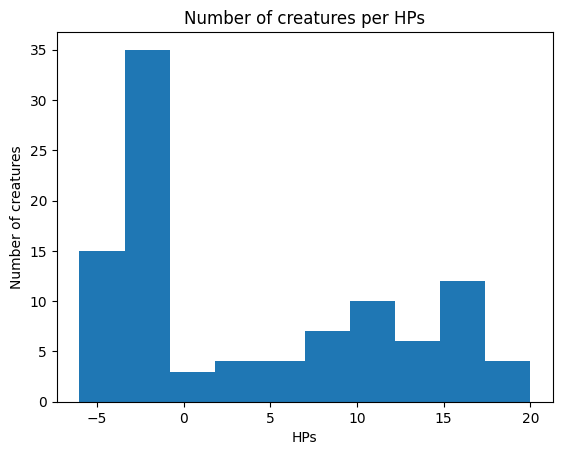

In [67]:
plt.hist(hps)
plt.title("Number of creatures per HPs")
plt.xlabel("HPs")
plt.ylabel("Number of creatures")
plt.show()